In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
autism = pd.read_csv('cleanedAutismData.csv')

In [3]:
autism.head()

,Unnamed: 0.1,Unnamed: 0,A1,A2,A3,A4,A5,A6,A7,A8,...,age,gender,ethnicity,Jundice_at_birth,Autistic_relative,contry_of_res,used_app_before,Full_score,relation,ASD
0,0,0,1,1,1,1,0,0,1,1,...,26,f,White-European,no,no,United States',no,6,Self,NO
1,1,1,1,1,0,1,0,0,0,1,...,24,m,Latino,no,yes,Brazil,no,5,Self,NO
2,2,2,1,1,0,1,1,0,1,1,...,27,m,Latino,yes,yes,Spain,no,8,Parent,YES
3,3,3,1,1,0,1,0,0,1,1,...,35,f,White-European,no,yes,United States',no,6,Self,NO
4,4,4,1,0,0,0,0,0,0,1,...,40,f,?,no,no,Egypt,no,2,?,NO


In [32]:
autism2 = autism[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7','A8', 'A9', 'A10', 'ASD']].groupby('ASD')


In [41]:
counts = autism.groupby('ASD')['A1'].value_counts()
counts

ASD  A1
NO   1     329
     0     183
YES  1     178
     0      11
Name: A1, dtype: int64

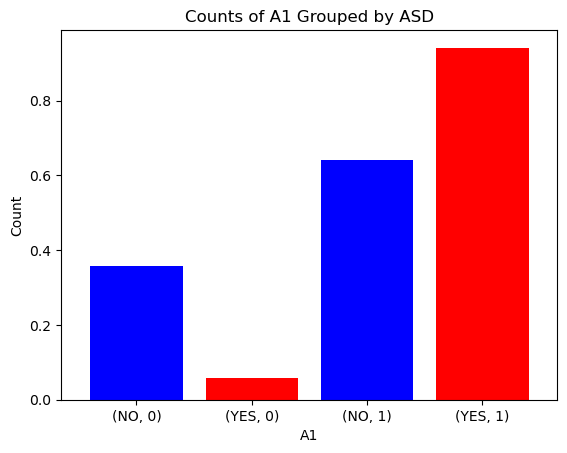

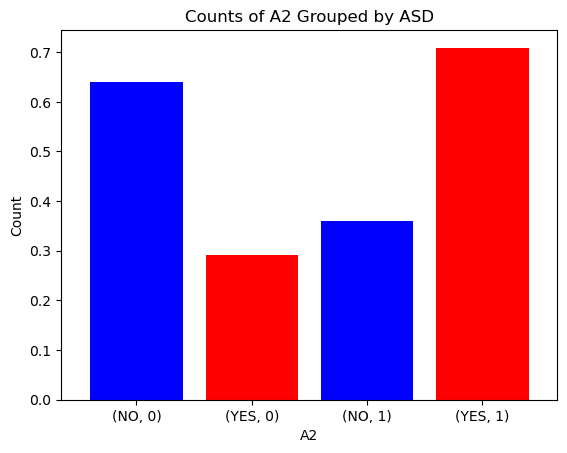

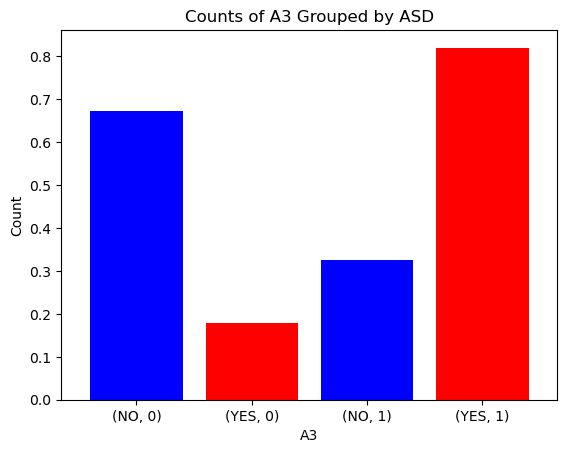

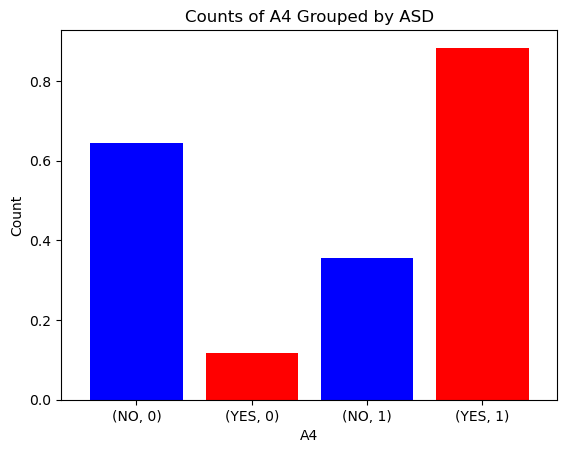

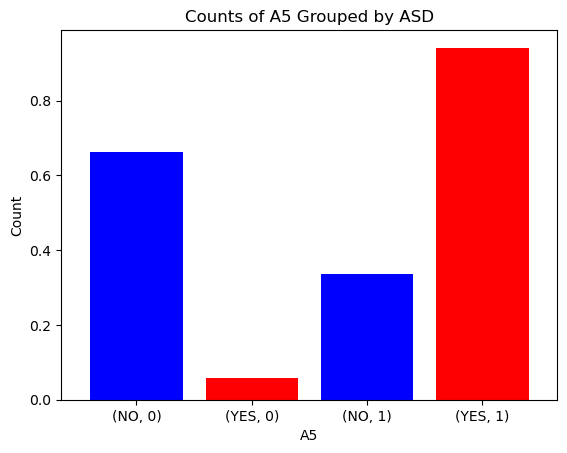

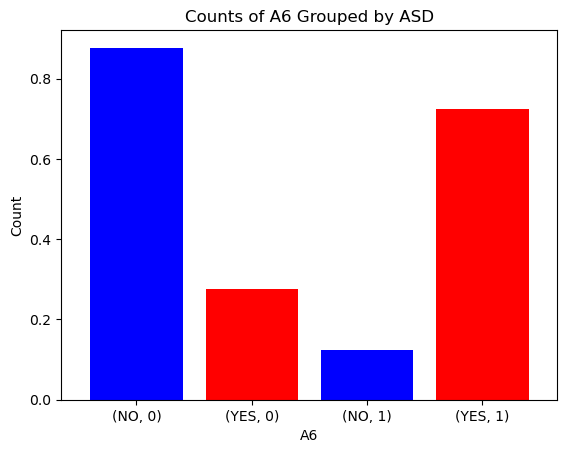

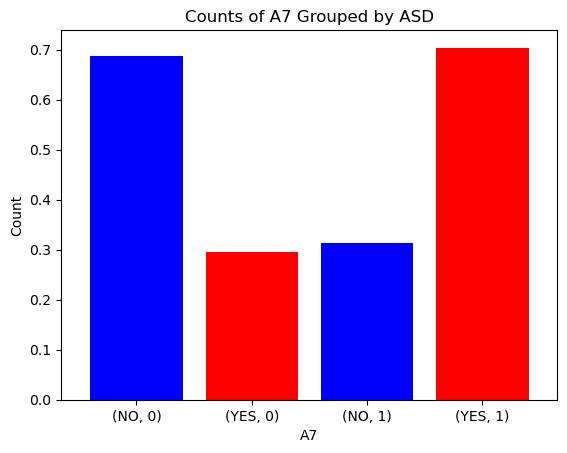

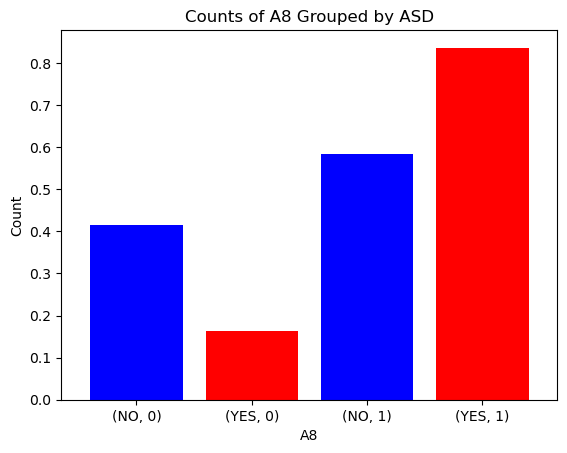

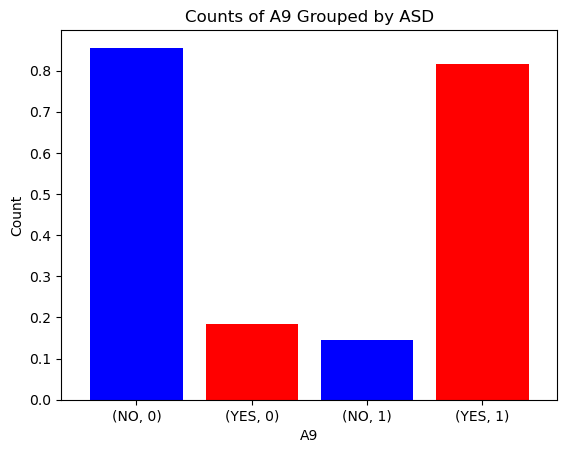

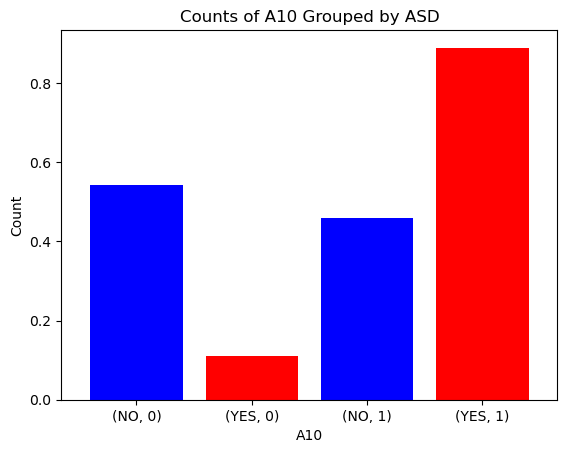

In [72]:

listquest = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7','A8', 'A9', 'A10']

for i in listquest:
    # Plot the counts as a bar plot
    counts = autism.groupby('ASD')[i].value_counts(normalize=True)
    counts = counts.reindex(index=[( 'NO', 0),('YES', 0),( 'NO', 1),('YES', 1)])
    counts.plot.bar(x=i, y='Count', rot=0, width=0.8, color=['Blue','Red','Blue','Red'], legend=False)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('Counts of '+ i + ' Grouped by ASD')
    
    plt.show()

People who said yes to having autism reported to say yes more in proportion to those who said no. 

In [69]:
counts.index
counts = counts.reindex(index=[( 'NO', 0),('YES', 0),( 'NO', 1),('YES', 1)])

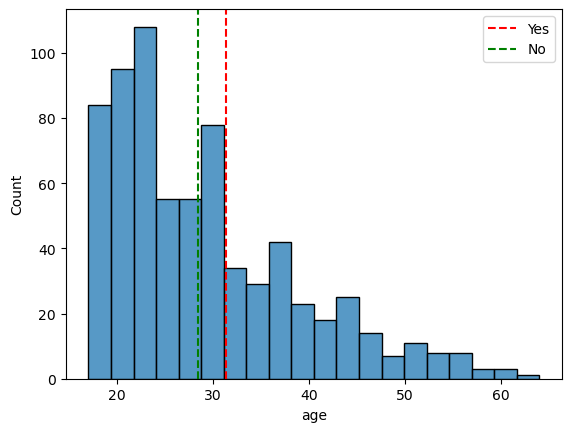

In [88]:
sns.histplot(data=autism, x='age', bins=20)
yes_mean_age = autism.loc[autism['ASD'] == 'YES', 'age'].mean()
no_mean_age = autism.loc[autism['ASD'] == 'NO', 'age'].mean()

# add vertical lines for the average age of people who answered 'yes' and 'no'
plt.axvline(x=yes_mean_age, color='red', linestyle='--', label='Yes')
plt.axvline(x=no_mean_age, color='green', linestyle='--', label='No')
plt.legend()
plt.show()

People who said yes to having autism tended to be a little older on average.

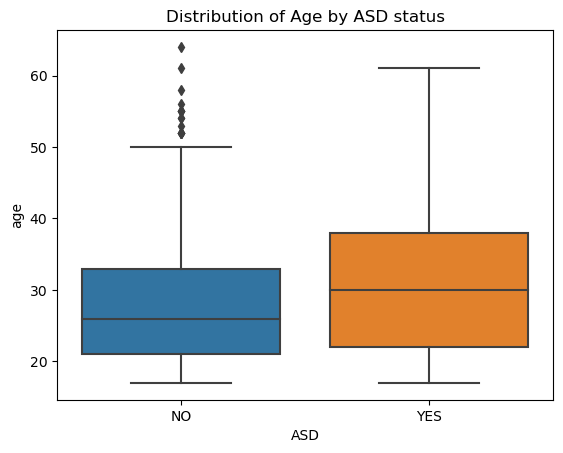

In [90]:
sns.boxplot(data=autism, x='ASD', y='age')
plt.title('Distribution of Age by ASD status')
plt.show()

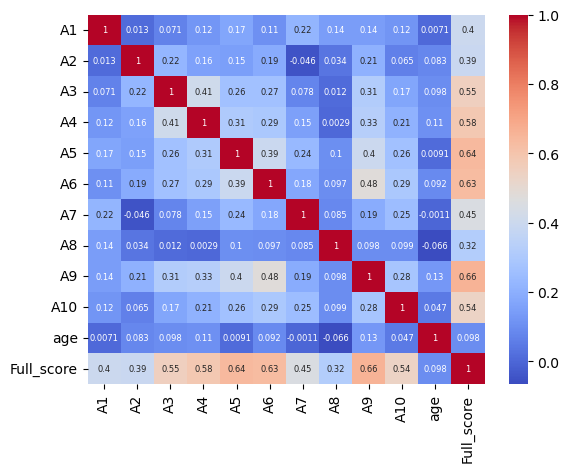

In [83]:
autism2 = autism[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10','age', 'gender', 'Jundice_at_birth',
       'Autistic_relative','Full_score', 'ASD']]
sns.heatmap(autism2.corr(), annot=True, cmap='coolwarm',annot_kws={'size': 6})
plt.show()

This above is cool but it only shows the numerical columns which doesn't include the one we want to see the most 'ASD'.

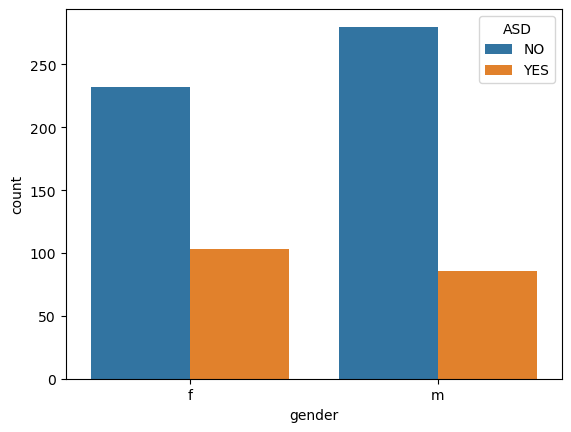

In [75]:
sns.countplot(data=autism, x='gender', hue='ASD')
plt.show()

It seems there were more males than femals with autism in both amount and proportion.

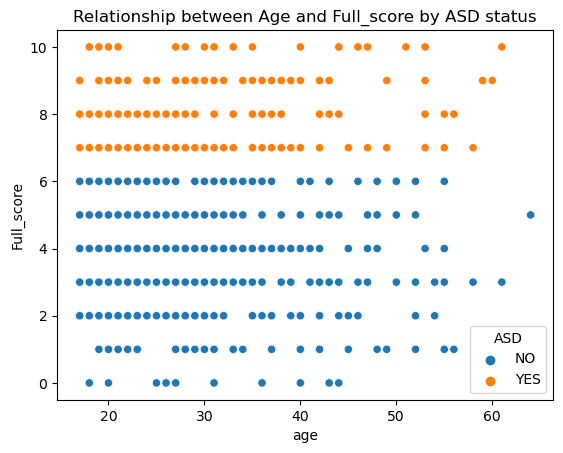

In [96]:
sns.scatterplot(data=autism, x='age', y='Full_score', hue='ASD')
plt.title('Relationship between Age and Full_score by ASD status')
plt.show()

This is really important because people who have autism tended to have more than 7 points in the full_score column

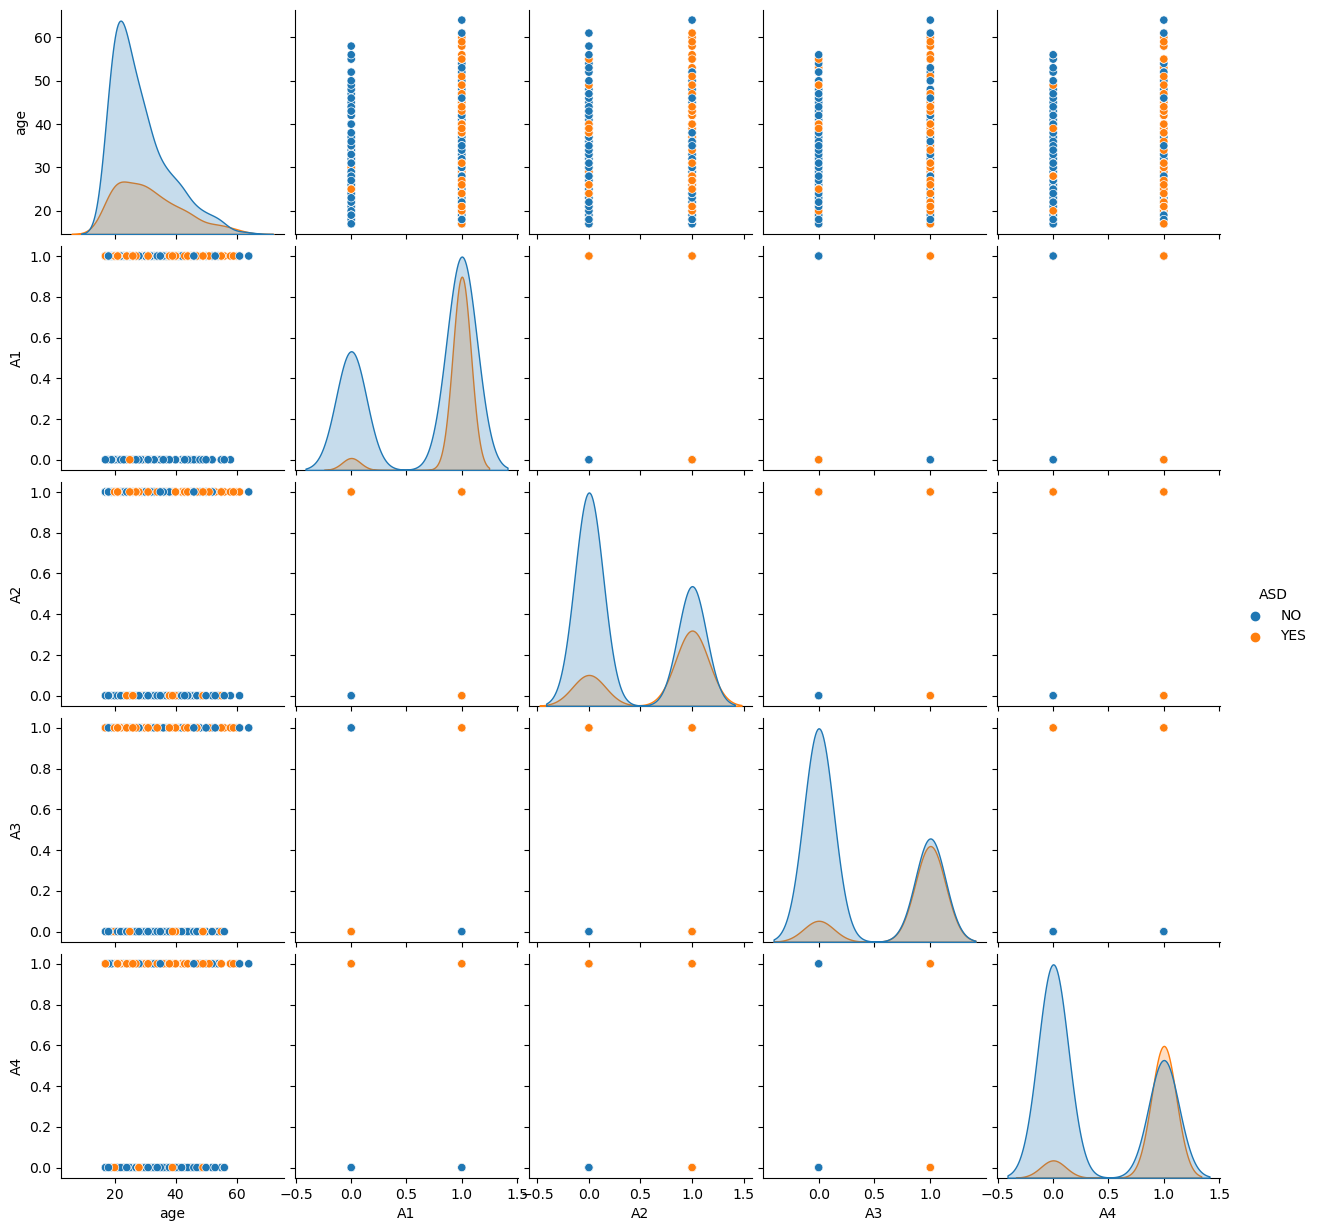

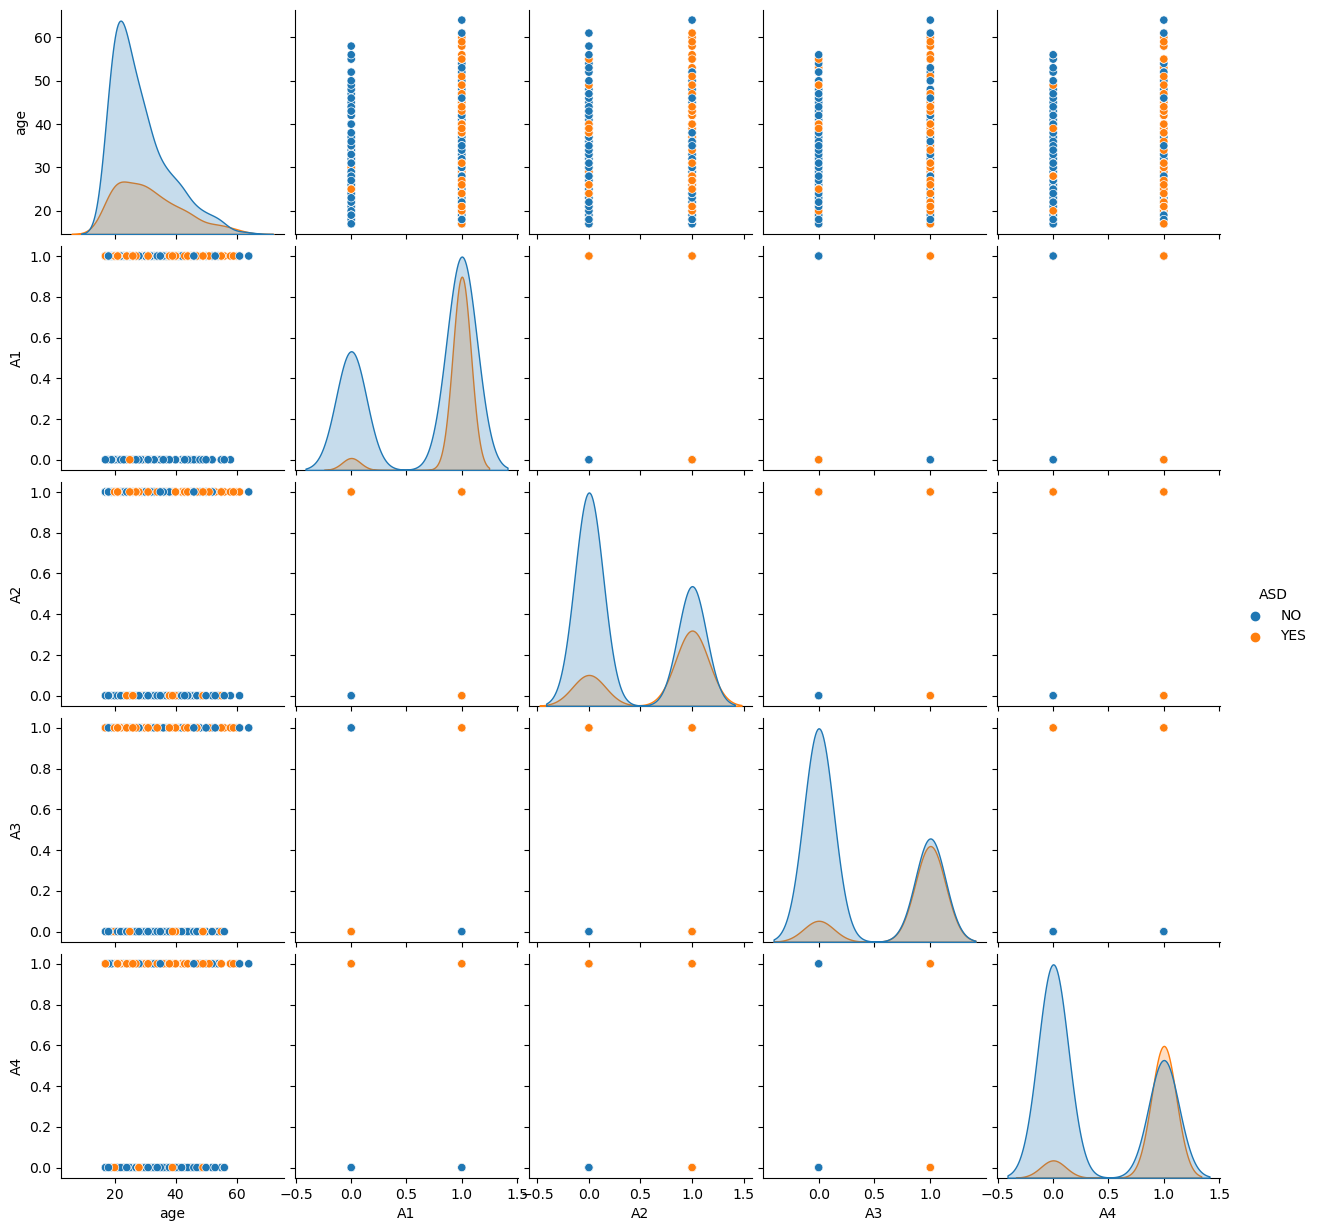

In [94]:
sns.pairplot(data=autism, vars=['age', 'A1', 'A2', 'A3', 'A4'], hue='ASD')
plt.show()